# **Principal Component Analysis**

In [ ]:
# Import necessary libraries
from sklearn import datasets
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import load_wine

# Load data

In [21]:
# Load dataset
wine = load_wine()

# Convert to DataFrame
df = pd.DataFrame(wine.data, columns=wine.feature_names)

# Add target (wine class)
df['target'] = wine.target

In [22]:
df.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0


In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   alcohol                       178 non-null    float64
 1   malic_acid                    178 non-null    float64
 2   ash                           178 non-null    float64
 3   alcalinity_of_ash             178 non-null    float64
 4   magnesium                     178 non-null    float64
 5   total_phenols                 178 non-null    float64
 6   flavanoids                    178 non-null    float64
 7   nonflavanoid_phenols          178 non-null    float64
 8   proanthocyanins               178 non-null    float64
 9   color_intensity               178 non-null    float64
 10  hue                           178 non-null    float64
 11  od280/od315_of_diluted_wines  178 non-null    float64
 12  proline                       178 non-null    float64
 13  targe

# Data Scaling

In [24]:
# Initialize the scaler
scaler = StandardScaler()

# Select features (drop target)
features = df.drop(columns="target")

# Fit and transform
scaled_data = pd.DataFrame(
    scaler.fit_transform(features),
    columns=features.columns,
    index=features.index
)

In [28]:
scaled_data.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,1.518613,-0.562250,0.232053,-1.169593,1.913905,0.808997,1.034819,-0.659563,1.224884,0.251717,0.362177,1.847920,1.013009
1,0.246290,-0.499413,-0.827996,-2.490847,0.018145,0.568648,0.733629,-0.820719,-0.544721,-0.293321,0.406051,1.113449,0.965242
2,0.196879,0.021231,1.109334,-0.268738,0.088358,0.808997,1.215533,-0.498407,2.135968,0.269020,0.318304,0.788587,1.395148
3,1.691550,-0.346811,0.487926,-0.809251,0.930918,2.491446,1.466525,-0.981875,1.032155,1.186068,-0.427544,1.184071,2.334574
4,0.295700,0.227694,1.840403,0.451946,1.281985,0.808997,0.663351,0.226796,0.401404,-0.319276,0.362177,0.449601,-0.037874


# Correlation before PCA

<Axes: >

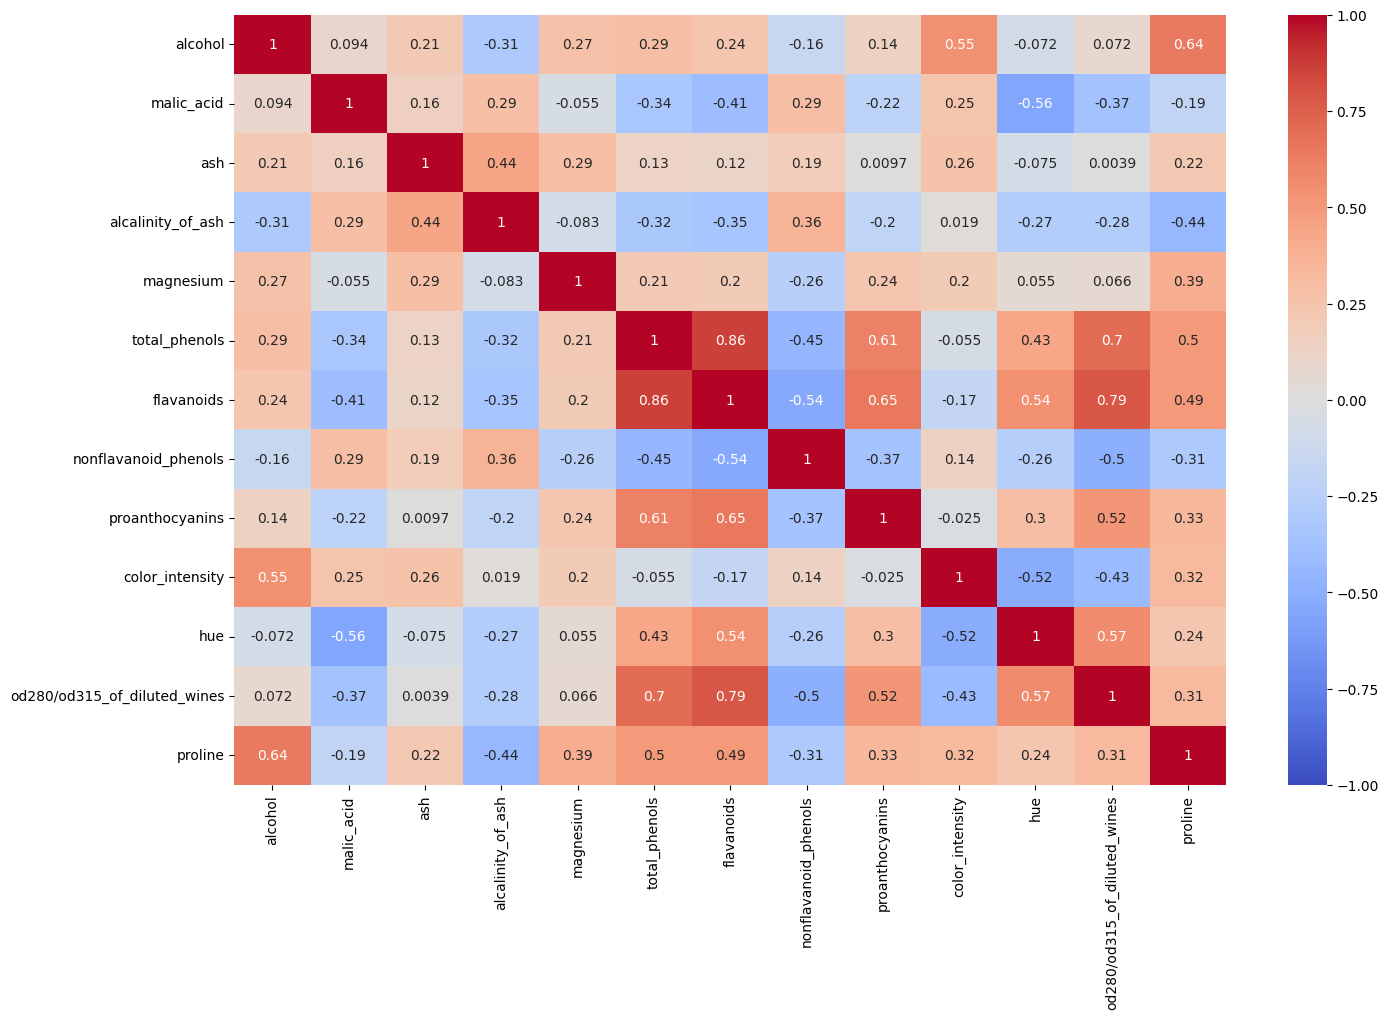

In [29]:
# Compute correlation matrix
correlation_matrix = scaled_data.corr()

plt.figure(figsize=(16, 10))

# Display correlation matrix in a heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)

There are many predictors having strong correlations with each others.

# PCA

In [30]:
pca = PCA(n_components = 6)
pca.fit(scaled_data)
data_pca = pca.transform(scaled_data)
data_pca = pd.DataFrame(data_pca,columns=['PC1','PC2','PC3','PC4','PC5','PC6'])
data_pca.head()

,PC1,PC2,PC3,PC4,PC5,PC6
0,3.316751,1.443463,-0.165739,-0.215631,0.693043,0.223880
1,2.209465,-0.333393,-2.026457,-0.291358,-0.257655,0.927120
2,2.516740,1.031151,0.982819,0.724902,-0.251033,-0.549276
3,3.757066,2.756372,-0.176192,0.567983,-0.311842,-0.114431
4,1.008908,0.869831,2.026688,-0.409766,0.298458,0.406520


# Correlation after PCA

<Axes: >

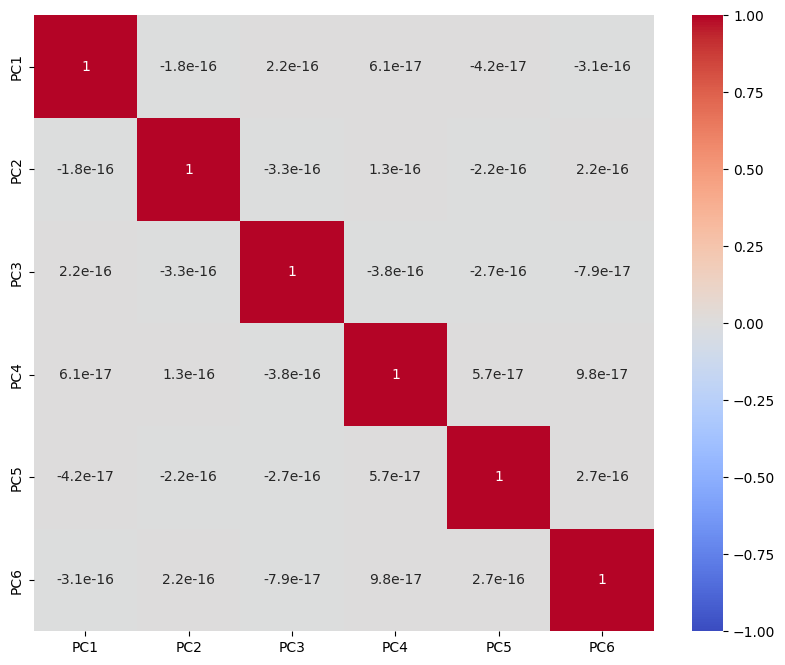

In [36]:
# Compute correlation matrix
correlation_matrix = data_pca.corr()

plt.figure(figsize=(10, 8))

# Display correlation matrix in a heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)

# **Citing this Notebook**
If you use this notebook in your work, please cite it as follows:

Linh, H. (2025). Machine Learning for Business. Lecture examples and exercises. (Version 1.0.0). URL: https://github.com/MsLinhEIU/MIS-451---Machine-Learning-for-Business-Analytics/tree/main